In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("netflix_titles.csv")

In [98]:
df.head()
    

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,Minutes,Unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,90.0,min
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,2.0,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,1.0,Season
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,1.0,Season
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,2.0,Seasons


In [5]:
df.shape

(8807, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [9]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [11]:
df.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isnull().sum() 

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<Axes: >

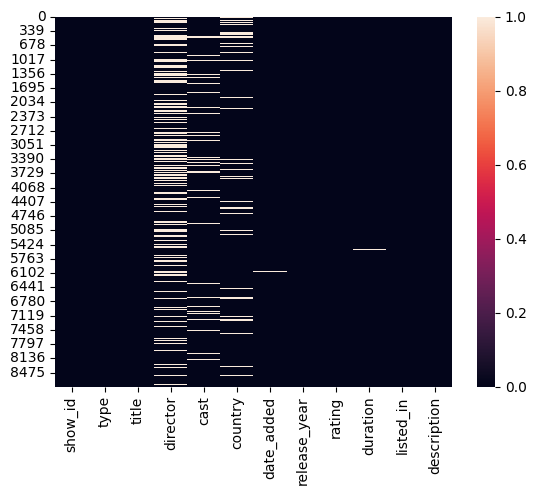

In [15]:
import seaborn as sns 
sns.heatmap(df.isnull())

## Q.1. For 'House of Cards',what is the show Id and who id the Director of this show ?

In [17]:
df[df['title'].isin(['House of Cards'])] 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1059,s1060,TV Show,House of Cards,NaN,"Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"April 14, 2021",2018,TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


## Q.2. In which year the highest number of the TV shows & Movies were released ? show with Bar Graph

In [22]:
release_counts = df['release_year'].value_counts().sort_index()

In [23]:
release_counts

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, Length: 74, dtype: int64

In [27]:
release_counts.max()

np.int64(1147)

In [29]:
max_year = release_counts.idxmax()
max_year

np.int64(2018)

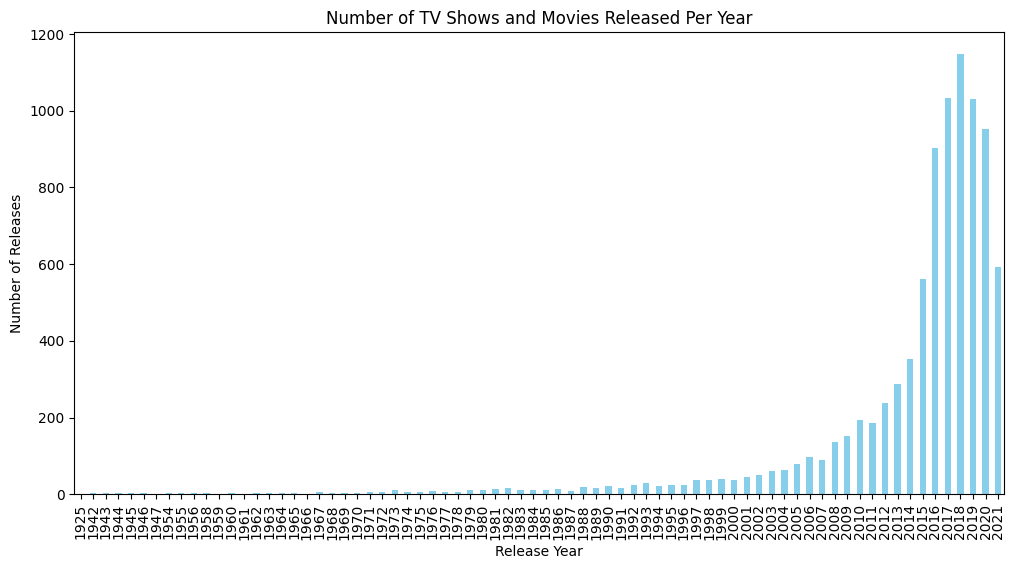

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
release_counts.plot(kind = 'bar',color='skyblue')
plt.title("Number of TV Shows and Movies Released Per Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Releases")
plt.show()

## Q.3. How many Movies & TV shows are in the dataset ? Show with Bar Graph

In [33]:
df.groupby('type').type.count()  

type
Movie      6131
TV Show    2676
Name: type, dtype: int64

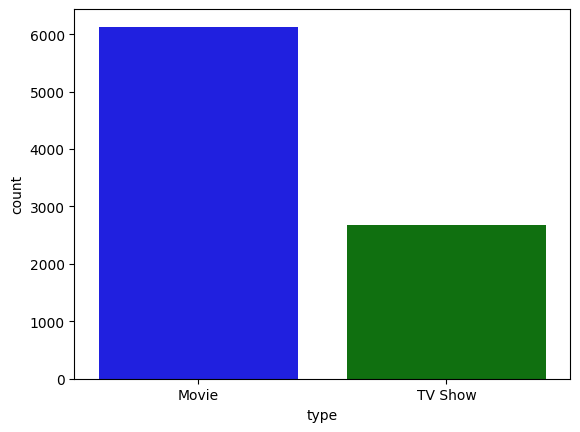

In [36]:
colors = ['blue', 'green']  
sns.countplot(x='type', data=df, hue='type', palette=colors)
plt.show()

## Q.4. Show all the Movies that were released in year 2020

In [39]:
movies_2020 = df[ (df["type"] =='Movie') & (df['release_year']==2020) ]

In [40]:
movies_2020

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",NaN,NaN,2021-09-22,2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...,2021.0
78,s79,Movie,Tughlaq Durbar,Delhiprasad Deenadayalan,"Vijay Sethupathi, Parthiban, Raashi Khanna",NaN,2021-09-11,2020,TV-14,145 min,"Comedies, Dramas, International Movies",A budding politician has devious plans to rise...,2021.0
84,s85,Movie,Omo Ghetto: the Saga,"JJC Skillz, Funke Akindele","Funke Akindele, Ayo Makun, Chioma Chukwuka Akp...",Nigeria,2021-09-10,2020,TV-MA,147 min,"Action & Adventure, Comedies, Dramas",Twins are reunited as a good-hearted female ga...,2021.0
103,s104,Movie,Shadow Parties,Yemi Amodu,"Jide Kosoko, Omotola Jalade-Ekeinde, Yemi Blaq...",NaN,2021-09-06,2020,TV-MA,117 min,"Dramas, International Movies, Thrillers",A family faces destruction in a long-running c...,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,s3047,Movie,All the Freckles in the World,Yibrán Asuad,"Hánssel Casillas, Loreto Peralta, Andrea Sutto...",Mexico,2020-01-03,2020,TV-14,90 min,"Comedies, International Movies, Romantic Movies",Thirteen-year-old José Miguel is immune to 199...,2020.0
3060,s3061,Movie,Ghost Stories,"Anurag Kashyap, Dibakar Banerjee, Karan Johar,...","Janhvi Kapoor, Sobhita Dhulipala, Sukant Goel,...",India,2020-01-01,2020,TV-MA,145 min,"Horror Movies, International Movies, Thrillers","The directors of Emmy-nominated ""Lust Stories""...",2020.0
5972,s5973,Movie,#cats_the_mewvie,Michael Margolis,NaN,Canada,2020-02-05,2020,TV-14,90 min,"Documentaries, International Movies",This pawesome documentary explores how our fel...,2020.0
7594,s7595,Movie,Norm of the North: Family Vacation,Anthony Bell,"Andrew Toth, Lisa Durupt, Jonathan Holmes, Pau...",United States,2020-05-25,2020,TV-Y7,89 min,Children & Family Movies,"Stressed by his duties as king and father, Nor...",2020.0


In [41]:
movies_2020.shape

(517, 13)

## Q.5. Show only the Titles of all TV shows that were released in India only

In [48]:
df[ (df['type'] == 'TV Show') & ( df['country']== 'India')]['title']

4                             Kota Factory
39                            Chhota Bheem
50                           Dharmakshetra
66           Raja Rasoi Aur Anya Kahaniyan
69          Stories by Rabindranath Tagore
                       ...                
8173                             Thackeray
8235                           The Calling
8321    The Golden Years with Javed Akhtar
8349                The House That Made Me
8775                       Yeh Meri Family
Name: title, Length: 79, dtype: object

## Q.6. Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix

In [50]:
df['director'].value_counts().head(10)

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64

## Q.7. Show Top 10 Directors, who gave the highest number of TV Shows to Netflix

In [51]:
tv_shows_df = df[df['type'] == 'TV Show']

In [53]:
top_directors = tv_shows_df['director'].value_counts().head(10)

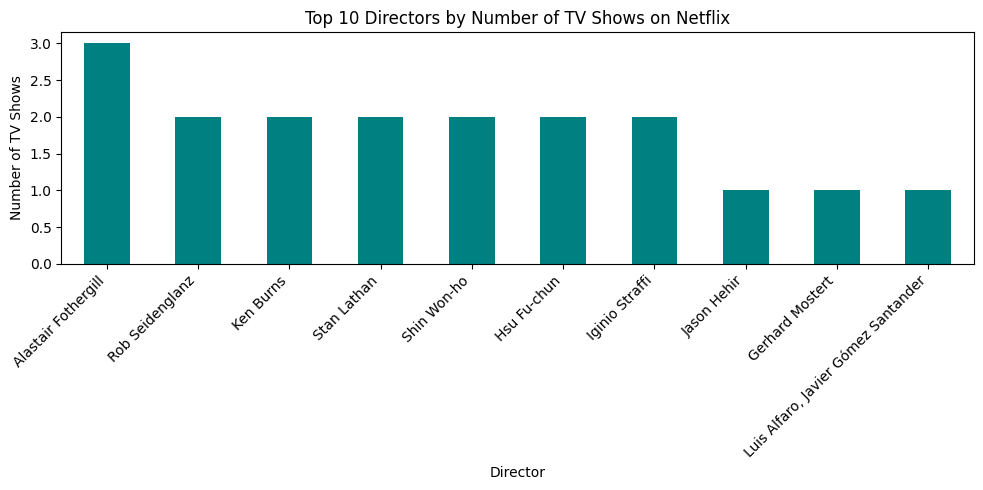

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
top_directors.plot(kind='bar', color='teal')
plt.title("Top 10 Directors by Number of TV Shows on Netflix")
plt.xlabel("Director")
plt.ylabel("Number of TV Shows")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Q.8.show all the Records ,where "type is Movie and genre is Comedians"or "country is United Kingdom".

In [57]:
df[ (df['type']=='Movie') & (df['listed_in']=='Comedies') |(df['country']=='United Kingdom')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021.0
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,2021.0
32,s33,TV Show,Sex Education,NaN,"Asa Butterfield, Gillian Anderson, Ncuti Gatwa...",United Kingdom,2021-09-17,2020,TV-MA,3 Seasons,"British TV Shows, International TV Shows, TV C...",Insecure Otis has all the answers when it come...,2021.0
65,s66,TV Show,Numberblocks,NaN,"Beth Chalmers, David Holt, Marcel McCalla, Ter...",United Kingdom,2021-09-15,2021,TV-Y,6 Seasons,Kids' TV,"In a place called Numberland, math adds up to ...",2021.0
72,s73,TV Show,Jack Whitehall: Travels with My Father,NaN,"Jack Whitehall, Michael Whitehall",United Kingdom,2021-09-14,2021,TV-MA,5 Seasons,"British TV Shows, Docuseries, International TV...",Jovial comic Jack Whitehall invites his stuffy...,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8740,s8741,TV Show,Wild Alaska,NaN,Dougray Scott,United Kingdom,2017-03-31,2015,TV-PG,1 Season,"British TV Shows, Docuseries, Science & Nature TV",The natural bounty of Alaska sustains its dive...,2017.0
8741,s8742,TV Show,Wild Arabia,NaN,Alexander Siddig,United Kingdom,2017-03-31,2013,TV-PG,1 Season,"British TV Shows, Docuseries, Science & Nature TV",The widely varied geology and dramatic landsca...,2017.0
8744,s8745,Movie,Williams,Morgan Matthews,NaN,United Kingdom,2017-11-04,2017,TV-MA,105 min,"Documentaries, International Movies, Sports Mo...",This inspiring documentary charts the birth of...,2017.0
8758,s8759,TV Show,World's Busiest Cities,NaN,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,2019-02-01,2017,TV-PG,1 Season,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali...",2019.0


## Q.9. In how many movies/shows,Tom Cruise was cast

In [60]:
movies_tom = df[ df["cast"] == 'Tom Cruise']

In [61]:
movies_tom

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added


In [65]:
df[df['cast'].str.contains('Tom Cruise', na=False)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
341,s342,Movie,Magnolia,Paul Thomas Anderson,"John C. Reilly, Philip Baker Hall, Tom Cruise,...",United States,2021-08-01,1999,R,189 min,"Dramas, Independent Movies","Through chance, history and divine interventio...",2021.0
1254,s1255,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,2021-03-01,1988,R,134 min,"Classic Movies, Dramas","Motivated by money, a selfish workaholic seeki...",2021.0


## Q.10. What are the different Ratings defined by Netflix

In [67]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

## Q.10.1 How many Movies got the "TV-PG" rating, in Canada ?

In [84]:
movies_tv_pg = df[ (df["type"] == 'Movie') & (df["rating"] == 'TV-PG') & (df["country"] == 'Canada')]

In [85]:
movies_tv_pg.shape

(15, 13)

## Q.11. What is the maximum duration of a Movie/show on Netflix?

In [87]:
df['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [88]:
df[['Minutes','Unit']] = df['duration'].str.split(' ',expand = True)

In [89]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,Minutes,Unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,90,min
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,2,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,1,Season


In [94]:
df['Minutes'] = df['Minutes'].str.extract('(\d+)').astype(float)


In [95]:
df['Minutes'].max()


np.float64(312.0)

## Q.12. Which individual country has the Highest No.of Tv shows?

In [97]:
df_tvshow = df[(df['type']== 'TV Show')]
df_tvshow.country.value_counts().head(1)

country
United States    760
Name: count, dtype: int64